# fashion mnist dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

In [3]:
print("dataset info")
print(f'train_images shape: {train_images.shape}')
print(f'train_labels shape: {train_labels.shape}')
print(f'test_images shape: {test_images.shape}')
print(f'test_labels shape: {test_labels.shape}')

dataset info
train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)


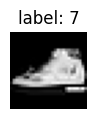

In [4]:
def show_image():
    from random import randint
    index = randint(0, 60000)
    plt.figure(figsize=(1,1))
    plt.imshow(train_images[index], cmap='gray')
    plt.title(f'label: {train_labels[index]}')
    plt.grid(False)
    plt.axis('off')
    plt.show()
show_image()

In [5]:
# normalize the images (0-255) to (0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [7]:
# cnn model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=train_images.shape[1:]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # output layer
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)             

In [9]:
epochs = 1
batch_size = 32
val_size = .2
patience = 5
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
board = tf.keras.callbacks.TensorBoard(log_dir='logs', histogram_freq=1)
history = model.fit(
    train_images, train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=val_size,
    callbacks=[es, board],
    verbose=1,
)

1500/1500 [==============================] - 11s 8ms/step - loss: 0.3003 - accuracy: 0.8911 - val_loss: 0.2939 - val_accuracy: 0.8936


In [10]:
# evaluate the model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3134 - accuracy: 0.8845


[0.3134315609931946, 0.8845000267028809]

In [ ]:
from PIL import Image
def predict_img(img_path):
    class_names = ['T-shirt/top', 
                'Trouser', 'Pullover', 
                'Dress', 'Coat', 
                'Sandal', 'Shirt', 
                'Sneaker', 'Bag', 
                'Ankle boot']
    img = Image.open(img_path).convert('L')             # load and make it grayscale
    img = img.resize((28, 28))                          # resize to 28x28
    img = np.array(img)                                 # convert to numpy array
    img = img / 255.0                                   # normalize
    img = img.reshape(1, 28, 28, 1)                     # reshape to (1, 28, 28, 1)
    prediction = model.predict(img)                     # predict
    name = class_names[np.argmax(prediction)]           # get the class name
    return {
        'prediction': np.argmax(prediction),
        'confidence': np.max(prediction),
        'name': name
    }

In [ ]:
img1 = r"c:/users/zaid/pictures/clothes/only-logoprintedt-shirt-black.jpg"
img2 = r"c:/users/zaid/pictures/clothes/71jtznTJPJL._AC_SL1200_.jpg"
img3 = r"c:/users/zaid/pictures/clothes/why-is-sky-blue.jpg"

print(predict_img(img1))
print(predict_img(img2))
print(predict_img(img3))

In [ ]:
show_image()

In [14]:
test_images[0].shape

(28, 28, 1)

In [20]:
ans = model.predict(test_images[5].reshape(1, 28, 28, 1))
print(np.argmax(ans))
class_names = ['T-shirt/top', 
                'Trouser', 'Pullover', 
                'Dress', 'Coat', 
                'Sandal', 'Shirt', 
                'Sneaker', 'Bag', 
                'Ankle boot']
print(class_names[np.argmax(ans)])

1/1 [==============================] - 0s 27ms/step
1
Trouser


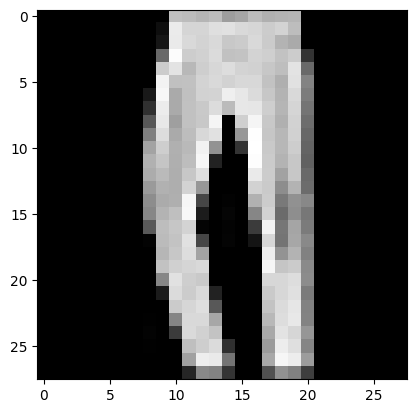

In [19]:
plt.imshow(test_images[5].reshape(28, 28), cmap='gray')